In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML
def pretty_print(df):
    return display(HTML(df.to_html().replace("\n","<br>")))

In [4]:
df = pd.read_csv('all_results_wup_0.76.csv')
df = df[['region', 'machine_clusters']]
df.machine_clusters = df.machine_clusters.str.split(',')
df.head()

,region,machine_clusters
0,Americas,"[Arts, Inequality, Land]"
1,Unspecified,"[Immaterial, Time, Community]"
2,Americas,"[Arts, Mind, Technology]"
3,Americas,"[Body, Emotion, Materiality]"
4,Europe,"[Arts, Mass media, Values]"


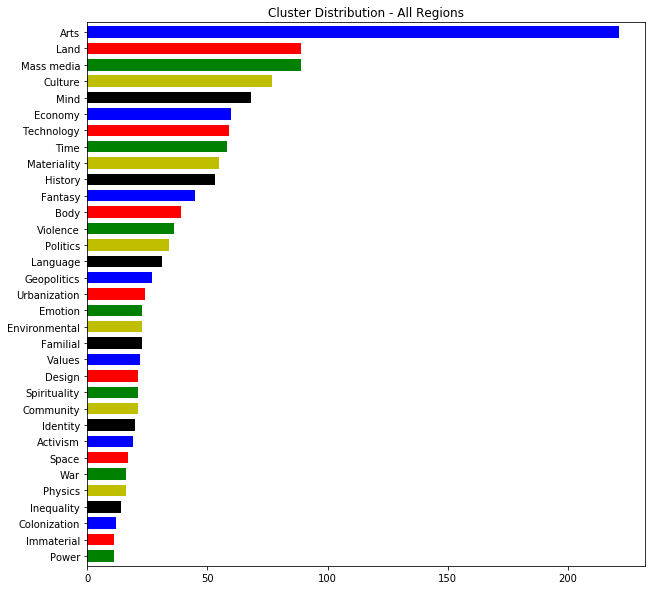

In [5]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
fig, ax = plt.subplots()
df['machine_clusters'].apply(pd.Series).stack()\
    .value_counts().plot(\
        kind='barh', 
        title="Cluster Distribution - All Regions", 
        figsize=(10,10),
        width=0.7,
        ax=ax, 
        colors=my_colors)
ax.invert_yaxis()

In [ ]:
fig, ax = plt.subplots()

data = df.machine_clusters.apply(pd.Series) \
    .merge(df, right_index = True, left_index = True) \
    .drop(["machine_clusters"], axis = 1) \
    .melt(id_vars = ['region'], value_name = "machine_clusters") \
    .drop("variable", axis = 1) \
    .dropna()

data.groupby(['region'])['machine_clusters'].hist(ax=ax, stacked=True)

